In [ ]:
!unzip /content/drive/MyDrive/dataset-hands.zip

Archive:  /content/drive/MyDrive/Colab_Notebooks2/dataset-hands.zip
replace dataset-finger-count-0to5/test/0/f5eb2608-b3bb-4b2f-8dc2-fe7dee9723b7.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset-finger-count-0to5/test/0/e63157ca-b847-41f1-a238-fa807ad78980.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset-finger-count-0to5/test/0/ec722d9f-1c50-4168-96bf-94544c914dd6.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/drive/MyDrive/Colab_Notebooks2/dataset-hands.zip
replace dataset-finger-count-0to5/test/0/f5eb2608-b3bb-4b2f-8dc2-fe7dee9723b7.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

from numpy.matrixlib.defmatrix import matrix

In [ ]:
#loading images from train, test, and val folders

train0= load_images_from_folder("dataset-finger-count-0to5/train/0")
train1= load_images_from_folder("dataset-finger-count-0to5/train/1")
train2= load_images_from_folder("dataset-finger-count-0to5/train/2")
train3= load_images_from_folder("dataset-finger-count-0to5/train/3")
train4= load_images_from_folder("dataset-finger-count-0to5/train/4")
train5= load_images_from_folder("dataset-finger-count-0to5/train/5")


test0=load_images_from_folder("dataset-finger-count-0to5/test/0")
test1=load_images_from_folder("dataset-finger-count-0to5/test/1")
test2=load_images_from_folder("dataset-finger-count-0to5/test/2")
test3=load_images_from_folder("dataset-finger-count-0to5/test/3")
test4=load_images_from_folder("dataset-finger-count-0to5/test/4")
test5=load_images_from_folder("dataset-finger-count-0to5/test/5")

In [ ]:
#printing the dimension and number of images in a folder
print("Number of images in train folder:", len(train0),",",len(train1),",",len(train2),",",len(train3),",",len(train4),",",len(train5))
print("Number of images in test folder:", len(test0),",",len(test1),",",len(test2),",",len(test3),",",len(test4),",",len(test5))

#dimension and number of an image
print("Dimension of each image:", test0[0].shape)

Number of images in train folder: 2400 , 2400 , 2400 , 2400 , 2400 , 2400
Number of images in test folder: 600 , 600 , 600 , 600 , 600 , 600
Dimension of each image: (128, 128)


In [ ]:
#Define threshold to make the background black
threshold=np.max(train0)/2
#threshold=np.mean(train0)
print(threshold)

127.5


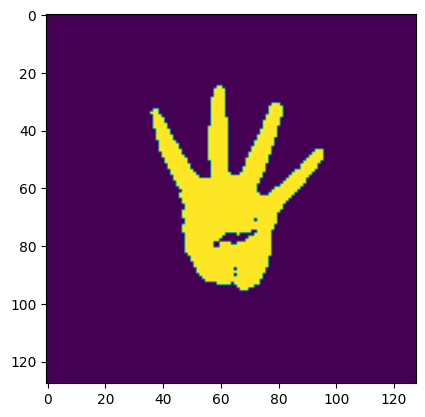

In [ ]:
import matplotlib.pyplot as plt

#make the image black and white as 0 and 1
a=train4[2]

np.mean(a)

a[a<threshold]=0
a[a>=threshold]=1

plt.imshow(a)

In [ ]:
def find_bounding_box(image):
    rows = np.any(image, axis=1)
    cols = np.any(image, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    return rmin, rmax, cmin, cmax

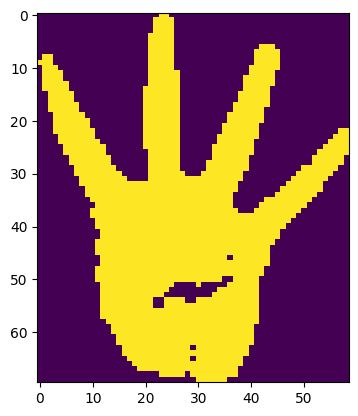

In [ ]:
# crop the image

rmin, rmax, cmin, cmax = find_bounding_box(a)

a=a[rmin:rmax,cmin:cmax]

plt.imshow(a)

In [ ]:
# Trim the training sets by cropping and making the background black

# Initialize a dictionary to store the common bounding box for each class
common_bboxes = {}

# Iterate through each class
for class_name, class_data in zip(["0", "1", "2", "3", "4", "5"], [train0, train1, train2, train3, train4, train5]):
    common_bbox = None

    # Iterate through each image in the class
    for image in class_data:

        threshold=np.max(image)/2

        # make the image black and white as 0 and 1
        image[image<threshold]=0
        image[image>=threshold]=1

        # crop the image
        rmin, rmax, cmin, cmax = find_bounding_box(image)

        # Update common bounding box
        if common_bbox is None:
            common_bbox = (rmin, rmax, cmin, cmax)
        else:
            common_bbox = (
                min(common_bbox[0], rmin),
                max(common_bbox[1], rmax),
                min(common_bbox[2], cmin),
                max(common_bbox[3], cmax))

    # Store the common bounding box for the class
    common_bboxes[class_name] = common_bbox

# Apply the common bounding box to all images for each class
processed_images_withCrop = {}
processed_images_withoutCrop = {}

for class_name, class_data in zip(["0", "1", "2", "3", "4", "5"], [train0, train1, train2, train3, train4, train5]):
    common_bbox = common_bboxes[class_name]

    # Apply the common bounding box to all images in the class
    processed_images_withoutCrop[class_name] = [image for image in class_data]
    processed_images_withCrop[class_name] = [image[rmin:rmax, cmin:cmax] for image in class_data]



In [ ]:
train0_withCrop=processed_images_withCrop["0"]
train1_withCrop=processed_images_withCrop["1"]
train2_withCrop=processed_images_withCrop["2"]
train3_withCrop=processed_images_withCrop["3"]
train4_withCrop=processed_images_withCrop["4"]
train5_withCrop=processed_images_withCrop["5"]

train0_withoutCrop=processed_images_withoutCrop["0"]
train1_withoutCrop=processed_images_withoutCrop["1"]
train2_withoutCrop=processed_images_withoutCrop["2"]
train3_withoutCrop=processed_images_withoutCrop["3"]
train4_withoutCrop=processed_images_withoutCrop["4"]
train5_withoutCrop=processed_images_withoutCrop["5"]

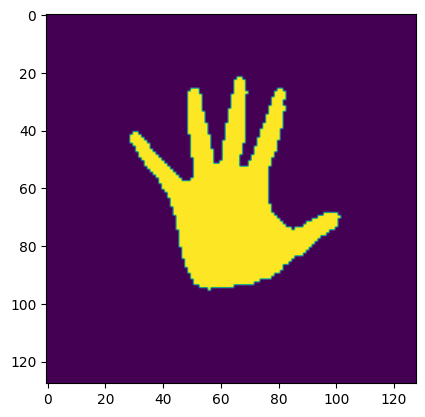

In [ ]:
# plot a cropped training image
a2=train5_withoutCrop[1]
plt.imshow(a2)

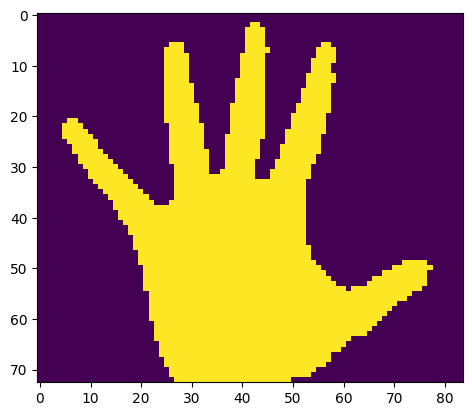

In [ ]:
# plot a cropped training image
a2=train5_withCrop[1]

plt.imshow(a2)

In [ ]:
#since the size of all training images are equal we select the sizeImage as follow
sizeImage_withoutCrop = train0_withoutCrop[0].shape[0]
sizeImage_withCrop = train0_withCrop[0].shape[0]
print(sizeImage_withoutCrop)
print(sizeImage_withCrop)

128
73


In [ ]:
# make ndarray for train data
numberOfImages_train=len(train0)+len(train1)+len(train2)+len(train3)+len(train4)+len(train5)
b0=len(train0)
b1=len(train1)
b2=len(train2)
b3=len(train3)
b4=len(train4)
b5=len(train5)

# ndarray with crop
ndarray_train_withoutCrop=np.ndarray(shape=(numberOfImages_train,sizeImage_withoutCrop,sizeImage_withoutCrop))
print(ndarray_train_withoutCrop.shape)
for i in range(0,b0):
  ndarray_train_withoutCrop[i]=cv2.resize(train0_withoutCrop[i], (sizeImage_withoutCrop, sizeImage_withoutCrop))
for i in range(0,b1):
  ndarray_train_withoutCrop[i+b0]=cv2.resize(train1_withoutCrop[i], (sizeImage_withoutCrop, sizeImage_withoutCrop))
for i in range(0,b2):
  ndarray_train_withoutCrop[i+b0+b1]=cv2.resize(train2_withoutCrop[i], (sizeImage_withoutCrop, sizeImage_withoutCrop))
for i in range(0,b3):
  ndarray_train_withoutCrop[i+b0+b1+b2]=cv2.resize(train3_withoutCrop[i], (sizeImage_withoutCrop, sizeImage_withoutCrop))
for i in range(0,b4):
  ndarray_train_withoutCrop[i+b0+b1+b2+b3]=cv2.resize(train4_withoutCrop[i], (sizeImage_withoutCrop, sizeImage_withoutCrop))
for i in range(0,b5):
  ndarray_train_withoutCrop[i+b0+b1+b2+b3+b4]=cv2.resize(train5_withoutCrop[i], (sizeImage_withoutCrop, sizeImage_withoutCrop))


# ndarray with without crop
ndarray_train_withCrop=np.ndarray(shape=(numberOfImages_train,sizeImage_withCrop,sizeImage_withCrop))
print(ndarray_train_withCrop.shape)
for i in range(0,b0):
  ndarray_train_withCrop[i]=cv2.resize(train0_withCrop[i], (sizeImage_withCrop, sizeImage_withCrop))
for i in range(0,b1):
  ndarray_train_withCrop[i+b0]=cv2.resize(train1_withCrop[i], (sizeImage_withCrop, sizeImage_withCrop))
for i in range(0,b2):
  ndarray_train_withCrop[i+b0+b1]=cv2.resize(train2_withCrop[i], (sizeImage_withCrop, sizeImage_withCrop))
for i in range(0,b3):
  ndarray_train_withCrop[i+b0+b1+b2]=cv2.resize(train3_withCrop[i], (sizeImage_withCrop, sizeImage_withCrop))
for i in range(0,b4):
  ndarray_train_withCrop[i+b0+b1+b2+b3]=cv2.resize(train4_withCrop[i], (sizeImage_withCrop, sizeImage_withCrop))
for i in range(0,b5):
  ndarray_train_withCrop[i+b0+b1+b2+b3+b4]=cv2.resize(train5_withCrop[i], (sizeImage_withCrop, sizeImage_withCrop))

print(ndarray_train_withoutCrop.shape)
print(ndarray_train_withCrop.shape)


(14400, 128, 128)
(14400, 73, 73)
(14400, 128, 128)
(14400, 73, 73)


In [ ]:
#####################################################
#####################################################
# Classificatio whith cropping

In [ ]:
#sizeImage=sizeImage_withoutCrop
sizeImage=sizeImage_withCrop

# make ndarray for test data
numberOfImages_test=len(test0)+len(test1)+len(test2)+len(test3)+len(test4)+len(test5)
b0=len(test0)
b1=len(test1)
b2=len(test2)
b3=len(test3)
b4=len(test4)
b5=len(test5)

ndarray_test=np.ndarray(shape=(numberOfImages_test,sizeImage,sizeImage))
print(ndarray_test.shape)
for i in range(0,b0):
  ndarray_test[i]=cv2.resize(test0[i], (sizeImage, sizeImage))
for i in range(0,b1):
  ndarray_test[i+b0]=cv2.resize(test1[i], (sizeImage, sizeImage))
for i in range(0,b2):
  ndarray_test[i+b0+b1]=cv2.resize(test2[i], (sizeImage, sizeImage))
for i in range(0,b3):
  ndarray_test[i+b0+b1+b2]=cv2.resize(test3[i], (sizeImage, sizeImage))
for i in range(0,b4):
  ndarray_test[i+b0+b1+b2+b3]=cv2.resize(test4[i], (sizeImage, sizeImage))
for i in range(0,b5):
  ndarray_test[i+b0+b1+b2+b3+b4]=cv2.resize(test5[i], (sizeImage, sizeImage))

print(ndarray_test.shape)


(3600, 73, 73)
(3600, 73, 73)


In [ ]:
# make the background black for test data
ndarray_test[ndarray_test<threshold]=0
ndarray_test[ndarray_test>=threshold]=1

In [ ]:
#Label the pictures, x will be considered as a pictures
#We need a label for each file
y_train=np.hstack([np.repeat(0,len(train0)),
                 np.repeat(1,len(train1)),
                 np.repeat(2,len(train2)),
                 np.repeat(3,len(train3)),
                 np.repeat(4,len(train4)),
                 np.repeat(5,len(train5))])
y_test=np.hstack([np.repeat(0,len(test0)),
                 np.repeat(1,len(test1)),
                 np.repeat(2,len(test2)),
                 np.repeat(3,len(test3)),
                 np.repeat(4,len(test4)),
                 np.repeat(5,len(test5))])

print(y_train)
print(y_train.shape)
print(y_test.shape)

[0 0 0 ... 5 5 5]
(14400,)
(3600,)


In [ ]:
#rename the variables to be compatible with the example provided in lecture.
X_test=ndarray_test
X_train=ndarray_train_withCrop
#X_train=ndarray_train_withoutCrop

#X_train=ndarray_train_withoutCrop

print("Training: ", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Training:  (14400, 73, 73) (14400,)
Test:  (3600, 73, 73) (3600,)


In [ ]:
#from keras.utils.np_utils  import to_categorical
from tensorflow.keras.utils  import to_categorical
y_train = to_categorical(y_train, num_classes=None)
y_test = to_categorical(y_test, num_classes=None)

In [ ]:
num_classes = y_train.shape[1]
print(num_classes)

6


In [ ]:
print(y_test.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)

(3600, 6)
(3600, 73, 73)
(14400, 6)
(14400, 73, 73)


In [ ]:
from tensorflow.keras import layers, models

# Create a Sequential model for a Convolutional Neural Network (CNN)
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(sizeImage, sizeImage, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output for fully connected layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization

model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer with num_classes=6 classes (0-5 fingers)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_2 (Dense)             (None, 512)              

In [ ]:
#the model is compidel base on the example
learning_rate = 0.001
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False) # from_logits is true when output of model is not probability but a logit(number)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
#optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# keras.metrics to get more evaluation metrics
# metric = tf.keras.metrics.TopKCategoricalAccuracy(k=1, name="Top-1 Accuracy")
model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])
# base_model.compile(loss=loss_fn, optimizer=optimizer, metrics=metric)

In [ ]:
n = 4 # number of epochs
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=n, batch_size=256)

Epoch 1/4
57/57 [==============================] - 137s 2s/step - loss: 1.7776 - accuracy: 0.1923 - val_loss: 20.9972 - val_accuracy: 0.1667
Epoch 2/4
57/57 [==============================] - 139s 2s/step - loss: 1.7174 - accuracy: 0.3522 - val_loss: 12.5917 - val_accuracy: 0.1733
Epoch 3/4
57/57 [==============================] - 137s 2s/step - loss: 1.6538 - accuracy: 0.5435 - val_loss: 10.2482 - val_accuracy: 0.2358
Epoch 4/4
57/57 [==============================] - 136s 2s/step - loss: 1.5754 - accuracy: 0.6708 - val_loss: 15.0191 - val_accuracy: 0.2283


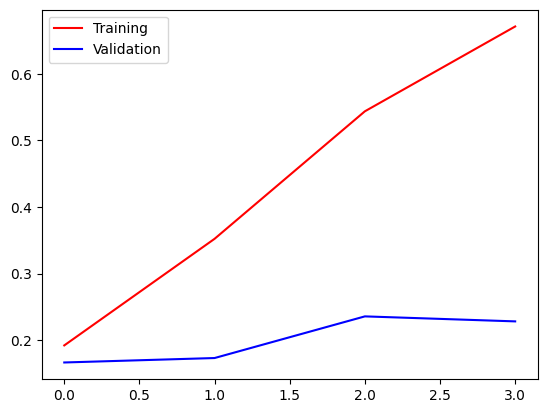

In [ ]:
x = list(range(n))
y = log.history['accuracy']
z = log.history['val_accuracy']

plt.plot(x,y,'r', label = "Training")
plt.plot(x,z,'b', label = "Validation")
plt.legend()

In [ ]:
#####################################################
#####################################################
# Classificatio whithout cropping

In [ ]:
sizeImage=sizeImage_withoutCrop

# make ndarray for test data
numberOfImages_test=len(test0)+len(test1)+len(test2)+len(test3)+len(test4)+len(test5)
b0=len(test0)
b1=len(test1)
b2=len(test2)
b3=len(test3)
b4=len(test4)
b5=len(test5)

ndarray_test=np.ndarray(shape=(numberOfImages_test,sizeImage,sizeImage))
print(ndarray_test.shape)
for i in range(0,b0):
  ndarray_test[i]=cv2.resize(test0[i], (sizeImage, sizeImage))
for i in range(0,b1):
  ndarray_test[i+b0]=cv2.resize(test1[i], (sizeImage, sizeImage))
for i in range(0,b2):
  ndarray_test[i+b0+b1]=cv2.resize(test2[i], (sizeImage, sizeImage))
for i in range(0,b3):
  ndarray_test[i+b0+b1+b2]=cv2.resize(test3[i], (sizeImage, sizeImage))
for i in range(0,b4):
  ndarray_test[i+b0+b1+b2+b3]=cv2.resize(test4[i], (sizeImage, sizeImage))
for i in range(0,b5):
  ndarray_test[i+b0+b1+b2+b3+b4]=cv2.resize(test5[i], (sizeImage, sizeImage))

print(ndarray_test.shape)



(3600, 128, 128)
(3600, 128, 128)


In [ ]:
#rename the variables to be compatible with the example provided in lecture.
X_test=ndarray_test
X_train=ndarray_train_withoutCrop

#X_train=ndarray_train_withoutCrop

print("Training: ", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Training:  (14400, 128, 128) (14400, 6)
Test:  (3600, 128, 128) (3600, 6)


In [ ]:
from tensorflow.keras import layers, models

# Create a Sequential model for a Convolutional Neural Network (CNN)
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(sizeImage, sizeImage, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output for fully connected layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization

model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer with num_classes=6 classes (0-5 fingers)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 57600)             0         
                                                                 
 dense_4 (Dense)             (None, 512)              

In [ ]:
#the model is compidel base on the example
learning_rate = 0.001
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False) # from_logits is true when output of model is not probability but a logit(number)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
#optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# keras.metrics to get more evaluation metrics
# metric = tf.keras.metrics.TopKCategoricalAccuracy(k=1, name="Top-1 Accuracy")
model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])
# base_model.compile(loss=loss_fn, optimizer=optimizer, metrics=metric)

In [ ]:
n = 4 # number of epochs
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=n, batch_size=256)

Epoch 1/4
57/57 [==============================] - 432s 8s/step - loss: 1.7550 - accuracy: 0.3574 - val_loss: 4.9884 - val_accuracy: 0.3728
Epoch 2/4
57/57 [==============================] - 434s 8s/step - loss: 1.6538 - accuracy: 0.6647 - val_loss: 5.6381 - val_accuracy: 0.5403
Epoch 3/4
57/57 [==============================] - 447s 8s/step - loss: 1.5297 - accuracy: 0.8006 - val_loss: 7.2593 - val_accuracy: 0.6078
Epoch 4/4
57/57 [==============================] - 488s 9s/step - loss: 1.3450 - accuracy: 0.8595 - val_loss: 18.7871 - val_accuracy: 0.5133


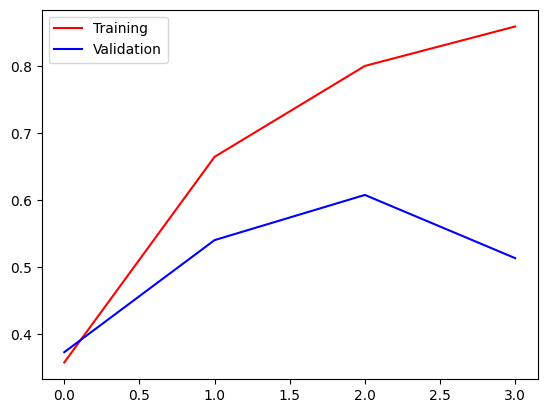

In [ ]:
x = list(range(n))
y = log.history['accuracy']
z = log.history['val_accuracy']

plt.plot(x,y,'r', label = "Training")
plt.plot(x,z,'b', label = "Validation")
plt.legend()